In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import datetime as dt
import pandas as pd
import numpy as np

from apidata import (
    closing_prices,
    optimize_portfolio,
    backtest_portfolio,
    evaluate_portfolio,
)

In [2]:
# 1: <Good Performance> Select Stocks For Inclusion in Portfolio
selected_stocks = ["AMZN","JPM","FCX","HAL","F"]

In [3]:
# 2: Optimize Portfolio Around List of Provided Stocks
portfolio = optimize_portfolio(selected_stocks)

[0] Retrieving Stock Data: AMZN
[1] Retrieving Stock Data: JPM
[2] Retrieving Stock Data: FCX
[3] Retrieving Stock Data: HAL
[4] Retrieving Stock Data: F

Optimizing Portfolio Weights >> Simulations: x 5000

Optimized Portfolio Weights:
AMZN        0.5705
F           0.0247
FCX         0.0159
HAL         0.0066
JPM         0.3823
Return      0.2284
Sharpe      0.6151
Variance    0.2120
Name: 4033, dtype: float64


In [4]:
# 3: Back-Test Performance of Optimized Portfolio Using Historical Data
performance = backtest_portfolio(portfolio)


Ticker: AMZN 	Portfolio Weight: 0.5705
                AMZN
Date                
2014-01-03 -0.002198
2014-01-06 -0.004058
2014-01-07  0.006342
2014-01-08  0.005549
2014-01-09 -0.001293

Ticker: F 	Portfolio Weight: 0.0247
                   F
Date                
2014-01-03  0.000112
2014-01-06  0.000111
2014-01-07 -0.000319
2014-01-08  0.000256
2014-01-09  0.000472

Ticker: FCX 	Portfolio Weight: 0.0159
                 FCX
Date                
2014-01-03 -0.000132
2014-01-06 -0.000128
2014-01-07 -0.000155
2014-01-08 -0.000201
2014-01-09 -0.000217

Ticker: HAL 	Portfolio Weight: 0.0066
                 HAL
Date                
2014-01-03  0.000016
2014-01-06  0.000025
2014-01-07 -0.000016
2014-01-08 -0.000093
2014-01-09  0.000015

Ticker: JPM 	Portfolio Weight: 0.3823
                 JPM
Date                
2014-01-03  0.002944
2014-01-06  0.002209
2014-01-07 -0.004432
2014-01-08  0.003588
2014-01-09 -0.000715

[Historic] Portfolio Performance:
                 AMZN         F     

In [5]:
# 4: Evaluate Portfolio Historic Performance Against Benchmark
pfolio_eval = evaluate_portfolio(performance)

                AMZN         F       FCX       HAL       JPM      RTNp  \
Date                                                                     
2014-01-03 -0.002198  0.000112 -0.000132  0.000016  0.002944  0.000743   
2014-01-06 -0.004058  0.000111 -0.000128  0.000025  0.002209 -0.001841   
2014-01-07  0.006342 -0.000319 -0.000155 -0.000016 -0.004432  0.001420   
2014-01-08  0.005549  0.000256 -0.000201 -0.000093  0.003588  0.009099   
2014-01-09 -0.001293  0.000472 -0.000217  0.000015 -0.000715 -0.001738   

                RTNm    Excess       Compare  
Date                                          
2014-01-03  0.005026 -0.004284  Underperform  
2014-01-06 -0.021439  0.019598    Outperform  
2014-01-07  0.005109 -0.003689  Underperform  
2014-01-08 -0.005897  0.014997    Outperform  
2014-01-09 -0.005932  0.004195    Outperform  


In [6]:
# [View] Portfolio Evaluation Summary
pfolio_eval.head()

,AMZN,F,FCX,HAL,JPM,RTNp,RTNm,Excess,Compare
Date,,,,,,,,,
2014-01-03,-0.002198,0.000112,-0.000132,0.000016,0.002944,0.000743,0.005026,-0.004284,Underperform
2014-01-06,-0.004058,0.000111,-0.000128,0.000025,0.002209,-0.001841,-0.021439,0.019598,Outperform
2014-01-07,0.006342,-0.000319,-0.000155,-0.000016,-0.004432,0.001420,0.005109,-0.003689,Underperform
2014-01-08,0.005549,0.000256,-0.000201,-0.000093,0.003588,0.009099,-0.005897,0.014997,Outperform
2014-01-09,-0.001293,0.000472,-0.000217,0.000015,-0.000715,-0.001738,-0.005932,0.004195,Outperform


In [7]:
# [View] Evaluation Sample Size
pfolio_eval.count()

AMZN       1063
F          1063
FCX        1063
HAL        1063
JPM        1063
RTNp       1063
RTNm       1063
Excess     1063
Compare    1063
dtype: int64

In [8]:
# [View] Portfolio/Market Performance Comparison Summary
round(pfolio_eval["Compare"].value_counts()/pfolio_eval["Compare"].count(), 4)

Outperform      0.5136
Underperform    0.4864
Name: Compare, dtype: float64

In [9]:
pfolio_eval["RTNp"].head(10)

Date
2014-01-03    0.000743
2014-01-06   -0.001841
2014-01-07    0.001420
2014-01-08    0.009099
2014-01-09   -0.001738
2014-01-10   -0.005867
2014-01-13   -0.015165
2014-01-14    0.010524
2014-01-15    0.009706
2014-01-16   -0.003120
Name: RTNp, dtype: float64

In [10]:
xaxis_dates = pfolio_eval.reset_index()["Date"]
xmin = xaxis_dates.iloc[0]
xmax = xaxis_dates.iloc[-1]

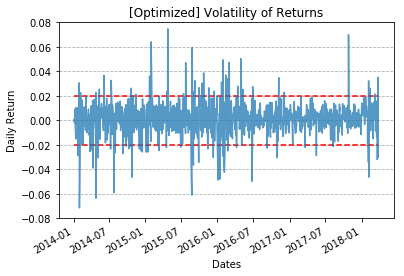

In [11]:
# [View] Volatility of Portfolio Returns
pfolio_eval["RTNp"].plot(alpha=.75)
plt.title("[Optimized] Volatility of Returns")
plt.xlabel("Dates")
plt.ylabel("Daily Return")
plt.ylim(-.08, .08)
plt.grid(axis="y", linestyle="dashed")
plt.hlines(.02, xmin, xmax, linestyle="dashed", colors="red")
plt.hlines(-.02, xmin, xmax, linestyle="dashed", colors="red")

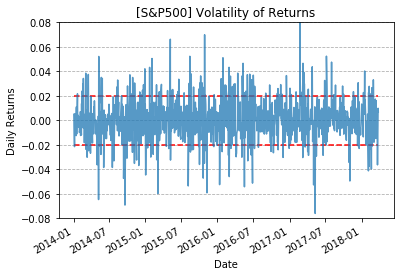

In [12]:
# [View] Volatility of Market Returns
pfolio_eval["RTNm"].plot(alpha=.75)
plt.title("[S&P500] Volatility of Returns")
plt.xlabel("Date")
plt.ylabel("Daily Returns")
plt.ylim(-.08, .08)
plt.grid(axis="y", linestyle="dashed")
plt.hlines(.02, xmin, xmax, linestyle="dashed", colors="red")
plt.hlines(-.02, xmin, xmax, linestyle="dashed", colors="red")

In [13]:
# Calculate Portfolio Beta -- Show The Correlation of Returns
# Explanation as to Why On an Absolute Basis Portfolio Underpeforms Only Slightly


In [14]:
rtn_df = pfolio_eval["RTNp"].apply(lambda x: x + 1).reset_index()

In [15]:
rtn_df.head()

,Date,RTNp
0,2014-01-03,1.000743
1,2014-01-06,0.998159
2,2014-01-07,1.001420
3,2014-01-08,1.009099
4,2014-01-09,0.998262


In [ ]:
rtn_df.iloc[0]["Date"].date()

In [ ]:
mkt_val = [(row[1][0].date(), row[1][1]) for row in rtn_df.iterrows()]

In [ ]:
mkt_val[:10]

In [16]:
pfolio_eval.describe()

,AMZN,F,FCX,HAL,JPM,RTNp,RTNm,Excess
count,1063.000000,1063.000000,1063.000000,1.063000e+03,1063.000000,1063.000000,1063.000000,1063.000000
mean,0.000711,-0.000008,-0.000012,-3.209241e-07,0.000221,0.000912,0.000294,0.000618
std,0.010585,0.000354,0.000577,1.291707e-04,0.005021,0.013410,0.017077,0.019227
min,-0.066465,-0.002104,-0.003614,-7.585735e-04,-0.027529,-0.071391,-0.076003,-0.084721
25%,-0.003945,-0.000179,-0.000276,-6.865347e-05,-0.002110,-0.005504,-0.008794,-0.009869
50%,0.000633,0.000000,-0.000008,-1.500512e-06,0.000204,0.001232,0.000000,0.000447
75%,0.005893,0.000199,0.000241,7.575392e-05,0.002856,0.007624,0.009350,0.011093
max,0.075407,0.001223,0.004007,6.941363e-04,0.030584,0.074764,0.082238,0.093376
